<a href="https://colab.research.google.com/github/rajeevak40/Retail_Analytics/blob/main/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : Customer Analytics
 Objective of this project is to pickup real time retail data and analyse the historical data and try to predict certain key ascpects.

In [42]:
# Importing key liberaies
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Import data set and analysis

In [43]:
# Loading data
df=pd.read_csv('/content/segmentation data.csv', index_col=0)


In [44]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [45]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [46]:
#Pearson Correlation of varibales
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


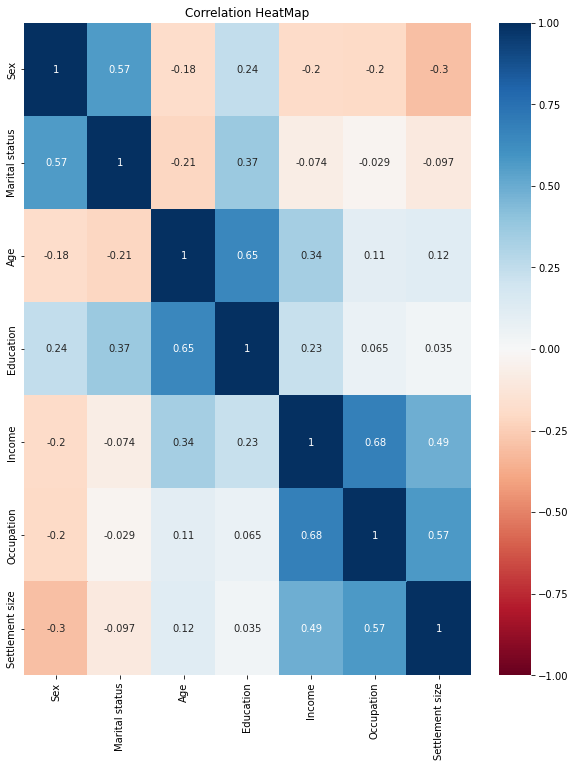

In [47]:
# Plotting them on head map
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), 
            annot=True,
            vmin=-1, vmax=1,
            cmap='RdBu')
plt.title('Correlation HeatMap')
plt.show()

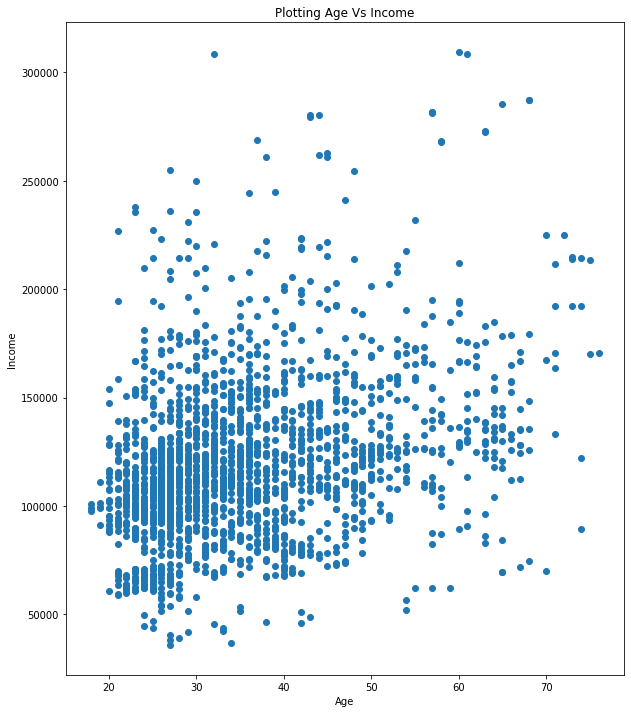

In [48]:
# Scatter Plot
plt.figure(figsize=(10,12))
plt.scatter(df.iloc[:,2], df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Plotting Age Vs Income")
plt.show() 

# Standardization of Data
Inorder the give equal weight for all the varibale it is important to do standarize the varibels and keep them in same range.

In [49]:
scaler= StandardScaler()
std_df= scaler.fit_transform(df)
std_df

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# Hierarchical Clustering

Clusting can be devisive (top down) or Agglomerative ( Bottoms up). 

In [50]:
df_h_cluster=linkage(std_df, method='ward')

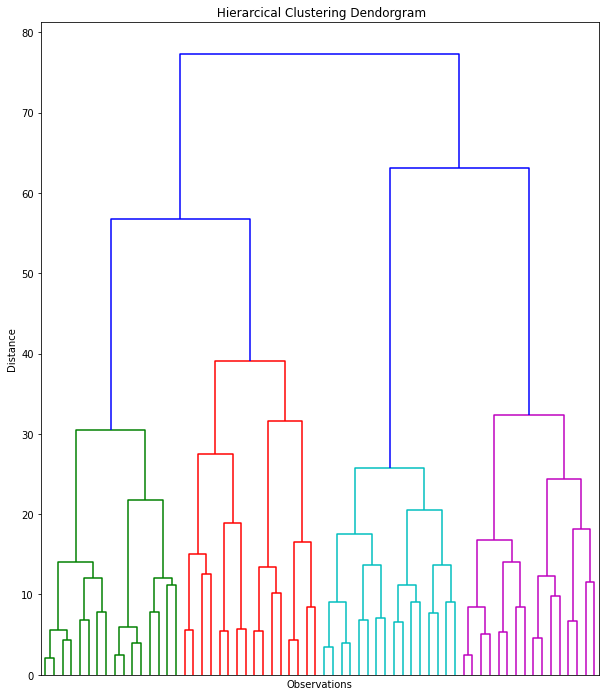

In [51]:
plt.figure(figsize=(10,12))
plt.title(' Hierarcical Clustering Dendorgram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(df_h_cluster, show_leaf_counts=False,no_labels=True, truncate_mode='level', p=5 )
plt.show()

# K-Means Clustering

Most commonly used clustering method.

In [56]:
#KMean computation
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init= 'k-means++', random_state=42)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

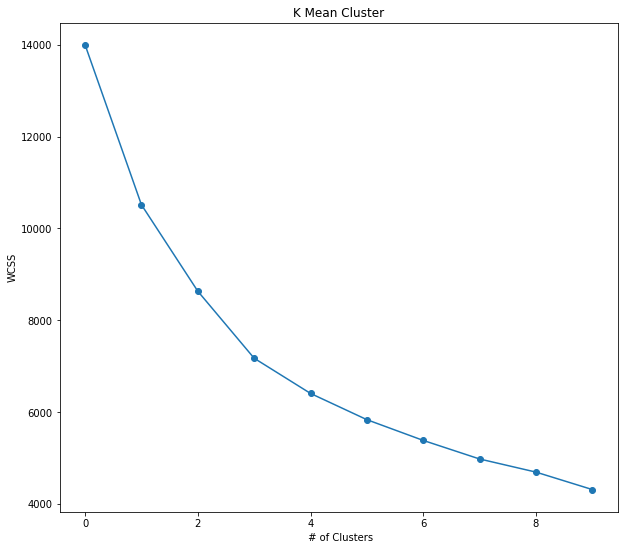

In [68]:
# Line Plot
plt.figure(figsize=(10,9))
plt.plot(wcss, marker="o", linestyle='-', )
plt.xlabel(' # of Clusters')
plt.ylabel('WCSS')
plt.title("K Mean Cluster")
plt.show() 

In [69]:
kmeans=KMeans(n_clusters=4, init= 'k-means++', random_state=42)
kmeans.fit(std_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [73]:
df_kmean= df.copy()
df_kmean['KMean_Segment']= kmeans.labels_

In [78]:
kMean_analysis=df_kmean.groupby(['KMean_Segment']).mean()
kMean_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
KMean_Segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [87]:
kMean_analysis['No_of_Observ']= df_kmean[['KMean_Segment', 'Sex']].groupby(['KMean_Segment']).count()
kMean_analysis['%_of Observ']= kMean_analysis['No_of_Observ']/kMean_analysis['No_of_Observ'].sum()

In [88]:
kMean_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No_of_Observ,%_of Observ
KMean_Segment,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [90]:
# Renaming Segments with correct classes
kMean_analysis.rename({0: 'Well_off', 1:'Few_Oppertunities', 2:'Standard', 3:'Career_Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No_of_Observ,%_of Observ
KMean_Segment,,,,,,,,,
Well_off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Few_Oppertunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Career_Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [93]:
df_kmean['Lables']=df_kmean['KMean_Segment'].map({0: 'Well_off', 1:'Few_Oppertunities', 2:'Standard', 3:'Career_Focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


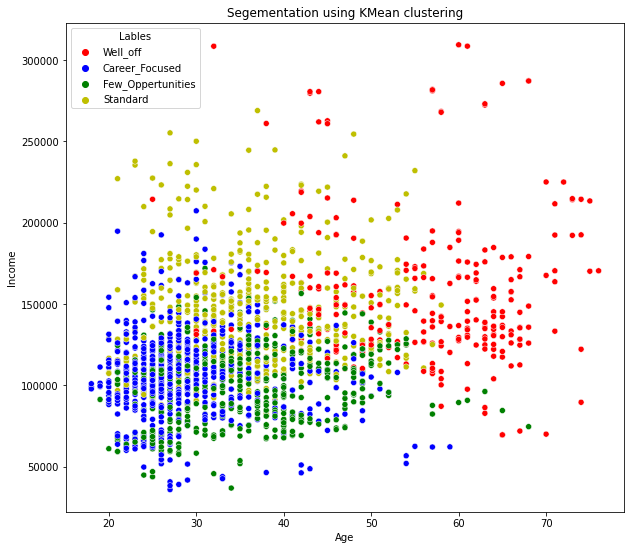

In [97]:
# Plotting the cluster on scattered plot in order to visualise.
x_axis = df_kmean['Age']
y_axis= df_kmean['Income']
plt.figure(figsize=(10,9))
sns.scatterplot(x_axis, y_axis,hue=df_kmean['Lables'],palette=['r', 'b', 'g', 'y'])
plt.title("Segementation using KMean clustering")
plt.show()



# Using Principal Component Analysis (PCA)

PCA is one of the menthod in dimensionality reduction. This helps in improving our accurancy in cluster creation.
